# Cognitive Algorithms - Assignment 6 (30 points)
Cognitive Algorithms        
Summer term 2018      
Technische Universität Berlin     
Fachgebiet Maschinelles Lernen 

**Due on July 16, 2018 10am via ISIS **
                    
After completing all tasks, run the whole notebook so that the content of each cell is properly displayed. Make sure that the code was ran and the entire output (e.g. figures) is printed. Print the notebook as a PDF file and again make sure that all lines are readable - use line breaks in the Python Code '\' if necessary. Points will be deducted, if code or content is not readable!                  
           
**Upload the PDF file that contains a copy of your notebook on ISIS.** 

Group:     
Members:     

# Part 1: Theory (15 points)
---
### Task 1: Multiple Choice Questions (2 points)
**A)** A Multilayer Perceptron can be used for ...           
- [X] classification                   
- [X] regression                       

**B)** The training algorithm of the MLP mainly consists of two phases. Which statement about the backward phase is true?       
- [X] the error of each neuron is computed for each neuron, starting with the neurons in the output layer          
- [ ] the error of each neuron is computed for each neuron, starting with the neurons in the input layer               

### Task 2: Learning Procedure (5 points)
Before we can use an MLP for a given task, we have to train it. This training procedure (here: batch mode) is composed of different steps, that you can find below. However, the order of the steps is not correct. Please bring the steps in the correct order.

1. FOR EACH input vector
1. END FOR EACH
1. REPEAT until stopping criterion is fulfilled
1. END REPEAT
1. compute the error of the neurons in the hidden layer
1. update the hidden layer weights
1. Initialize all weights
1. compute the activation of each neuron of the hidden layer
1. update the output layer weights
1. compute the error of the output neuron
1. compute the activation of the output layer neurons

**[Your solution for task 2 here]**       
1. Initialize all weights
1. FOR EACH input vector
1. compute the activation of each neuron of the hidden layer
1. compute the activation of the output layer neurons
1. END FOR EACH
1. REPEAT until stopping criterion is fulfilled
1. compute the error of the output neuron
1. update the output layer weights
1. compute the error of the neurons in the hidden layer
1. update the hidden layer weights
1. END REPEAT

**[Online Mode]** 
1. Initialize all weights
1. FOR EACH input vector
1. compute the activation of each neuron of the hidden layer
1. compute the activation of the output layer neurons
1. REPEAT until stopping criterion is fulfilled
1. compute the error of the output neuron
1. update the output layer weights
1. compute the error of the neurons in the hidden layer
1. update the hidden layer weights
1. END REPEAT
1. END FOR EACH

### Task 3: Linear Activation Function (8 points)
It can be shown, if a multilayer perceptron has a linear activation function in all neurons, any number of layers can be reduced to a two-layer input-output model.                                         
Consider an MLP with $N$ input neurons $x_n$, one hidden layer with $K$ neurons $z_k$ and a single output $y$. ${\alpha_k}_n$ define the weights connecting neuron $x_n$ and $z_k$, and $\beta_k$ the weights connecting $z_k$ and the output. ${\alpha_k}_0$ and $\beta_0$ are the weights of the biases. All neurons have a linear activation function, thus the output of a hidden neuron can be written as 
$$z_k = -{\alpha_k}_0 + \sum_{n=1}^{N} {\alpha_k}_n x_n$$
and the total output becomes 
$$y = -\beta_0 + \sum_{k=1}^{K} \beta_k z_k$$

**A) (4 points)** Draw a graph representing the MLP and annotate it with the relevant variables (input, hidden and output neurons, bias and weights).

**[Your answer for 3A here]**

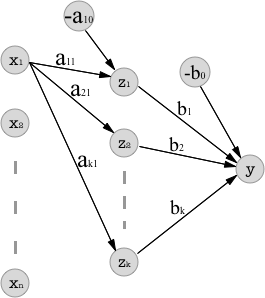

**B) (4 points)** Show that there exists an MLP without hidden layers, which models the same function.

**[Your answer for 3B here]**

Since $z_k=-\alpha_{k0}+\sum_{n=1}^{N}\alpha_{kn}x_n$, we plug it into $y=-\beta_0+\sum_{k=1}^{K}\beta_kz_k$:
$$y=-\beta_0+\sum_{k=1}^K\beta_k(-\alpha_{k0}+\sum_{n=1}^N\alpha_{kn}x_n)=-(\beta_0+\sum_{k=1}^K\beta_k\alpha_{k0})+\sum_{n=1}^N\sum_{k=1}^K\beta_k\alpha_{kn}x_n$$

If we treat $a_{kn}$ as the $k$-th row and $n$-th column entry of a matrix $\underline{a}$ and let $\beta_k$ as the $k$-th element of vector $\underline{\beta}$. Then, the term $\sum_{k=1}^K\beta_ka_{k0}$ is the scalar product of the first column of matrix $\underline{a}$ and vector $\underline{\beta}$. Similarly, $\sum_{k=1}^K\beta_ka_{kn}$ can also be treat as a constant.

Let $\gamma_0=\beta_0+\sum_{k=1}^K\beta_k\alpha_{k0}$ and $\gamma_n=\sum_{k=1}^K\beta_k\alpha_{kn}$, the equation above can be reformulated as:
$$y=-\gamma_0+\sum_{n=1}^N\gamma_nx_n$$

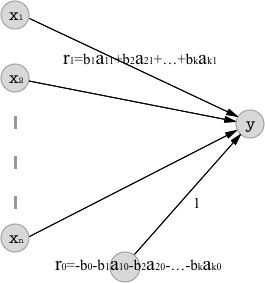

# Part 2: Programming (15 points)
---
Like in the first assignment you aim to recognize handwritten digits. This time you will not train a linear perceptron, but a non-linear multilayer perceptron (MLP). You won’t have to implement it – we just want you to play around with existing code and modify it slightly. We are using the ```scikit-learn``` implementation, that can be found here:            
http://scikit-learn.org/stable/modules/neural_networks_supervised.html            
You might have to install ```scikit-learn``` beforehand. Follow the instructions on their webpage to do so.                   
This time we will use the full MNIST Data set.             

Below you find the code to load the MNIST dataset and to train an MLP.

In [1]:
import numpy as np
from scipy.ndimage import convolve
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.externals import joblib
import os.path
import scipy as sp
import pylab as pl
%matplotlib inline

In [5]:
PATH = 'mlp_model.pkl'

if __name__ == '__main__':
    print('Fetching and loading MNIST data')
    # fetch the full MNIST data set
    mnist = fetch_mldata('MNIST original')
    # put the data into X, and the corresponding label into y
    X, y = mnist.data, mnist.target

    # at first, normalise the pixel value into interval [0,1]
    # then, split the dataset randomly(with seed 0) into two parts:
    #       1. the training set which contains 75% of all data points
    #       2. the testing set which contains the other 25%
    X_train, X_test, y_train, y_test = train_test_split(X / 255., y, test_size=0.25, random_state=0)

    print('Got MNIST with %d training- and %d test samples' % (len(y_train), len(y_test)))
    print('Digit distribution in whole dataset:', np.bincount(y.astype('int64')))
    
    clf = None
    # if there exists an optimal model in file, load it
    if os.path.exists(PATH):
        print('Loading model from file.')
        clf = joblib.load(PATH).best_estimator_
    else:
    # if not, learn the optimal model from training set
        print('Training model.')
        # create three kinds of MLP:
        # 1. one hidden layer with 256 neurons
        # 2. one hidden layer with 512 neurons
        # 3. three hidden layer with respectively 128, 256, 128 neurons
        params = {'hidden_layer_sizes': [(256,), (512,), (128, 256, 128,)]}
        # create a MLP classifier with adaptive learning rate, and it will print progress message
        mlp = MLPClassifier(verbose=10, learning_rate='adaptive')
        # exhaustive search over given parameter values for an estimator
        # applying 5-fold cross-validation
        # printing progress message
        # doesn't running in parallel
        clf = GridSearchCV(mlp, params, verbose=10, n_jobs=-1, cv=5)
        # start to learning from the training set
        clf.fit(X_train, y_train)
        print('Finished with grid search with best mean cross-validated score:', clf.best_score_)
        print('Best params appeared to be', clf.best_params_)
        # dump the results into a file
        joblib.dump(clf, PATH)
        # set current classifier to be the best one for the given training data
        clf = clf.best_estimator_

Fetching and loading MNIST data
Got MNIST with 52500 training- and 17500 test samples
('Digit distribution in whole dataset:', array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))
Training model.
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] hidden_layer_sizes=(256,) .......................................
[CV] hidden_layer_sizes=(256,) .......................................
[CV] hidden_layer_sizes=(256,) .......................................
[CV] hidden_layer_sizes=(256,) .......................................
Iteration 1, loss = 0.40400388
Iteration 1, loss = 0.40594400
Iteration 1, loss = 0.40789382
Iteration 1, loss = 0.40850807
Iteration 2, loss = 0.18491516
Iteration 2, loss = 0.18530030
Iteration 2, loss = 0.18635234
Iteration 2, loss = 0.18563619
Iteration 3, loss = 0.13349432
Iteration 3, loss = 0.13385706
Iteration 3, loss = 0.13178063
Iteration 3, loss = 0.13553246
Iteration 4, loss = 0.10173980
Iteration 4, loss = 0.10111122
Iteration 

[CV] hidden_layer_sizes=(512,) .......................................


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  8.8min


Iteration 19, loss = 0.00218262
Iteration 17, loss = 0.00312392
Iteration 18, loss = 0.00269552
Iteration 20, loss = 0.00195382
Iteration 1, loss = 0.35149970
Iteration 18, loss = 0.00263167
Iteration 19, loss = 0.00236765
Iteration 21, loss = 0.00171220
Iteration 2, loss = 0.15085008
Iteration 19, loss = 0.00232172
Iteration 20, loss = 0.00185969
Iteration 22, loss = 0.00147928
Iteration 3, loss = 0.10112894
Iteration 20, loss = 0.00200698
Iteration 21, loss = 0.00161749
Iteration 23, loss = 0.00136260
Iteration 4, loss = 0.07398328
Iteration 21, loss = 0.00173043
Iteration 22, loss = 0.00145925
Iteration 24, loss = 0.00524668
Iteration 5, loss = 0.05628660
Iteration 22, loss = 0.00153028
Iteration 23, loss = 0.00135622
Iteration 25, loss = 0.02306795
Iteration 6, loss = 0.04348777
Iteration 23, loss = 0.00144439
Iteration 24, loss = 0.00121771
Iteration 26, loss = 0.00730996
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 7, loss =

[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 14.3min remaining:  7.2min


Iteration 26, loss = 0.00112157
Iteration 6, loss = 0.04283616
Iteration 19, loss = 0.00310453
Iteration 1, loss = 0.40325206
Iteration 7, loss = 0.03037911
Iteration 27, loss = 0.00104061
Iteration 2, loss = 0.15145994
Iteration 8, loss = 0.02532486
Iteration 20, loss = 0.00256573
Iteration 3, loss = 0.10433974
Iteration 9, loss = 0.01918779
Iteration 28, loss = 0.00095087
Iteration 4, loss = 0.07516224
Iteration 10, loss = 0.01619175
Iteration 21, loss = 0.00235317
Iteration 5, loss = 0.05702099
Iteration 11, loss = 0.01549202
Iteration 29, loss = 0.00090989
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV] .. hidden_layer_sizes=(512,), score=0.980756406592, total= 6.1min
[CV] hidden_layer_sizes=(128, 256, 128) ..............................
Iteration 22, loss = 0.00195853
Iteration 12, loss = 0.01375779
Iteration 6, loss = 0.04251142
Iteration 1, loss = 0.40492473
Iteration 13, loss = 0.01505473
Iteration 7, loss = 0.03521047
Iteration 2

[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 16.1min remaining:  4.0min


Iteration 10, loss = 0.01973271
Iteration 28, loss = 0.01639573
Iteration 22, loss = 0.01041267
Iteration 11, loss = 0.01650972
Iteration 23, loss = 0.00632787
Iteration 29, loss = 0.01689403
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 12, loss = 0.01209641
[CV] .. hidden_layer_sizes=(512,), score=0.979611280488, total= 5.8min
Iteration 24, loss = 0.00793397
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV]  hidden_layer_sizes=(128, 256, 128), score=0.973050185697, total= 2.7min
Iteration 13, loss = 0.01712862
Iteration 14, loss = 0.01147641
Iteration 15, loss = 0.00942355
Iteration 16, loss = 0.01034381
Iteration 17, loss = 0.01104544
Iteration 18, loss = 0.01085124
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV]  hidden_layer_sizes=(128, 256, 128), score=0.975323932927, total= 1.6min


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 16.6min finished


Iteration 1, loss = 0.31809287
Iteration 2, loss = 0.13401846
Iteration 3, loss = 0.08938571
Iteration 4, loss = 0.06375981
Iteration 5, loss = 0.04837591
Iteration 6, loss = 0.03776920
Iteration 7, loss = 0.02926929
Iteration 8, loss = 0.02247063
Iteration 9, loss = 0.01743263
Iteration 10, loss = 0.01462695
Iteration 11, loss = 0.01063859
Iteration 12, loss = 0.00846674
Iteration 13, loss = 0.00665365
Iteration 14, loss = 0.00536471
Iteration 15, loss = 0.00431498
Iteration 16, loss = 0.00361012
Iteration 17, loss = 0.00284718
Iteration 18, loss = 0.00290561
Iteration 19, loss = 0.01215630
Iteration 20, loss = 0.01062116
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
('Finished with grid search with best mean cross-validated score:', 0.9784)
('Best params appeared to be', {'hidden_layer_sizes': (512,)})


**A) (4 points)** Shortly explain in your own words, what the code does. Ideally explain it line-by-line (```print``` statements can be omitted). You can write short comments directly in the code. 

**B) (1 point)**  Run the code (this may take a while when running it for the first time). What are the training and testing errors?         
*Hint: The current progress is printed on the Jupyter Notebook terminal.* 

In [6]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9981714285714286
0.9771428571428571


The training error is **~[0.001828571428571]**.                      
The test error is **~[0.022857142857143]**.             

**C) (4 points)** What does ```GridSearchCV``` do? Do we really need this function? Explain your decision.

**[Your answer for C here]**         

Given three parameters, that is, three kinds of configurations for hidden layers(the number of layers, and how many neurons in each layer), GridSearchCV search exhaustively over those specified parameter values for an estimator in order to find a better model.

It's necessay to do this function, since we have to do model selection via model evalution. GridSearchCV implements the nested cross-validation algorithm, and its results report the mean score of each configuration with different parameters. 

**D) (3 points)** What role plays the ```random_state``` parameter in ```train_test_split```? What happens if we left it out?

**[Your answer for D here]**

the random_state parameter in train_test_split indicates that the whole dataset is split into training set and testing set by randomly sampling. That is, we randomly pick out some of the whole data points to form training set. It's necessary to decrease the overfitting risk.

In extreme cases, such as our handwritten digits are ascending ordered like 1,2,3..., then, if we don't pick data point randomly, we will only pick samples from the front several digits, i.e., all training data only contains samples from digit 1. This will lead our network to have bad generalisation property.

**E) (3 points)** We now want to compare an MLP without any hidden units with a single Perceptron. To do so, first train an MLP without an hidden layer by changing the given code. Print its training and test error. Compare the result to the one you obtained when training the Perceptron on the ```USPS``` dataset (assignment 2). Is this MLP then the same algorithm as the Perceptron of assignment 2? 

In [10]:
if __name__ == '__main__':
    mnist = fetch_mldata('MNIST original')
    X, y = mnist.data, mnist.target
    X_train, X_test, y_train, y_test = train_test_split(X / 255., y, test_size=0.25, random_state=0)
    mlp = MLPClassifier(hidden_layer_sizes=(), verbose=False, learning_rate='adaptive')
    mlp.fit(X_train, y_train)
    print(mlp.score(X_train, y_train))
    print(mlp.score(X_test, y_test))

0.9390285714285714
0.9235428571428571


The training error is **~[0.060971428571429]**.                   
The test error is **~[0.076457142857143]**.              

**[Your answer for E here]**

This MLP is the same algorithm as the Perceptron algorithm of assignment 2, since there are only input and output layer in MLP. This kind of configuration is just a kind of linear model, and the same with the Perceptron algorithm.